In [11]:
import qiskit
import matplotlib as mpl
from random import choice, randint
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.quantum_info import Statevector
from qiskit.providers.provider import Provider
from qiskit_aer import AerSimulator, AerProvider


In [12]:
def Oracle(circuit,n):     #begin our function
    oracle_type = choice(['Constant0','Constant1','Balanced'])
    circuit.barrier()
    if oracle_type == 'Balanced':
        flipGates = randint(0,(2**n)-1)    #random binary num between
                                    #0 and 7
        flipGates = format(flipGates, '0'+str(n)+'b') #convert to binary

        for qbit in range(0,len(flipGates)):   #iterate through flipGates
            if flipGates[qbit] == '1':
                circuit.x(qbit)     #flip qubit if necessary
        for qbit in range(0,n):    #CX Gate controlled on every query qubit
            circuit.cx(qbit,n+1)   #and targeting auxiliary qubit
        for qbit in range(0,len(flipGates)):   #unflip qubits so output
            if flipGates[qbit] == '1':         #reveals nothing except
                circuit.x(qbit)                #what the original input was
    elif oracle_type == 'Constant0':
        circuit.z(n)    #flip Auxiliary 
    elif oracle_type == 'Constant1':
        pass
    
    return circuit, oracle_type

In [13]:
n = 3    #the size of our Query, NOT including the Auxiliary
circuit = qiskit.QuantumCircuit(n+1,n+1)   #create circuit including                                                                   ⠀                                         
 #Auxiliary qubit & bit

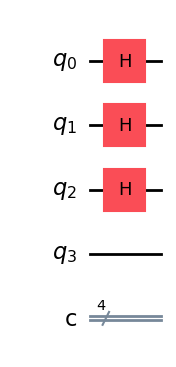

In [14]:
for i in range(0,n):
    circuit.h(i)
    
circuit.draw('mpl')

In [15]:
#before Oracle function, after applying Hadamards to Query
circuit.x(n)    #flip Auxiliary
circuit.h(n)    #put into |-> state

In [16]:
circuit, oracle_type = Oracle(circuit,n)


In [17]:

#after Oracle function
for qbit in range(0,n+1):
    circuit.h(qbit)    #apply Hadamard to each qubit
    circuit.measure(qbit,qbit)    #measure qubit onto respective bit

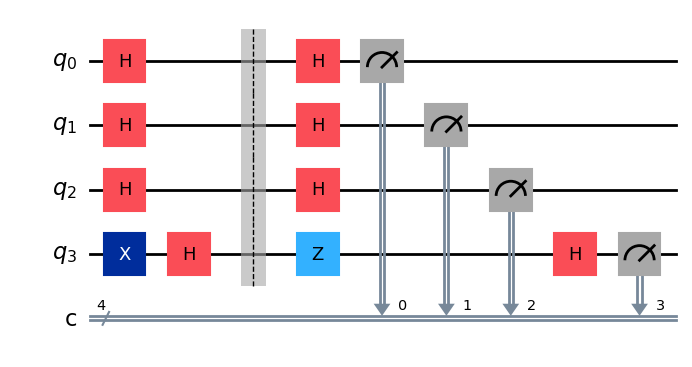

In [21]:
service = QiskitRuntimeService(channel="ibm_quantum", token="e6dec15dab235c04a88b1aee92cec77d00a5e29cd7a1b296c7fbccf841e64a91e3aa19343670a23c1fcb3cd8e3ae523c6dddd0e3f63137681a0cbe9861885c52")
backend = service.backend("ibmq_qasm_simulator")
job = backend.run(circuit, shots=1024)
result = job.result()
noisy_measurements = result.get_counts()   #returns dictionary, with
                                           #output string as keys 
                                           #and count as the 
                                           #respective value#get the result which occurred the most
measurements = max(noisy_measurements, key=noisy_measurements.get)
circuit.draw('mpl')

In [19]:
query_state = measurements[-1] #gets the last element in the arrayprint('Prediction:')
if query_state == '1':
    print('Balanced')
else:    #Constant Query
    aux_output = measurements[0]
    if aux_output == '1':
        print('Constantly 0')
    else: 
        print('Constantly 1')

Constantly 1


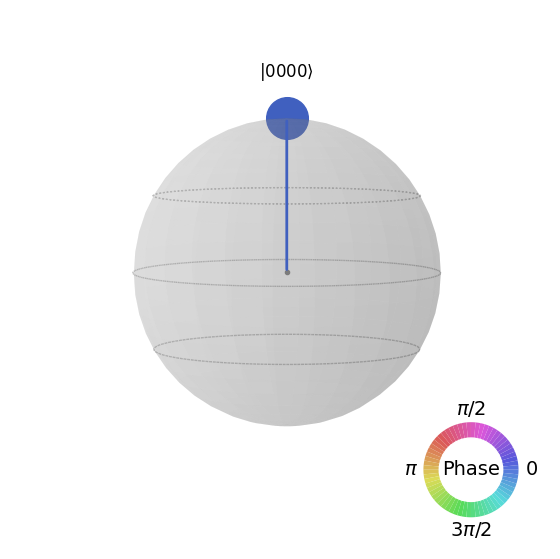

In [20]:
aer = AerProvider()
backend = aer.get_backend("statevector_simulator")
job = backend.run(circuit, shots=1024)
result = job.result()
state = result.get_statevector()
state.draw('qsphere')